### Project - Thera Bank Personal Loan Campaign

This case is about a bank (Thera Bank) whose management wants to explore ways of converting
its liability customers to personal loan customers (while retaining them as depositors). A
campaign that the bank ran last year for liability customers showed a healthy conversion rate of
over 9% success. This has encouraged the retail marketing department to devise campaigns
with better target marketing to increase the success ratio with a minimal budget.

#### Domain 
Banking



In [ ]:
#Claire Bilski link to GitHub
https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-claireebilski.git

#### 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [109]:
import pandas as pd
import numpy as np 
import seaborn as sns   
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

from sklearn.model_selection import train_test_split

import numpy as np
import os,sys
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [110]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
datadf = pd.DataFrame(data)

In [5]:
#checking VIF number from data for Regression errors, if needed
#from patsy import dmatrices
#import statsmodels.api as sm
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
#df.dropna()
#df = df._get_numeric_data() #This line will drop non-numeric cols
#df.head()
# For each X, calculate VIF and save in dataframe
#vif = pd.DataFrame()
#vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif["features"] = X.columns

In [53]:
#Apply info to check datatype
datadf.info()
datadf.describe() #statistical summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,2500.50,45.34,20.10,73.77,93152.50,2.40,1.94,1.88,56.50,0.10,0.10,0.06,0.60,0.29
std,1443.52,11.46,11.47,46.03,2121.85,1.15,1.75,0.84,101.71,0.29,0.31,0.24,0.49,0.46
min,1.00,23.00,-3.00,8.00,9307.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1250.75,35.00,10.00,39.00,91911.00,1.00,0.70,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2500.50,45.00,20.00,64.00,93437.00,2.00,1.50,2.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,3750.25,55.00,30.00,98.00,94608.00,3.00,2.50,3.00,101.00,0.00,0.00,0.00,1.00,1.00
max,5000.00,67.00,43.00,224.00,96651.00,4.00,10.00,3.00,635.00,1.00,1.00,1.00,1.00,1.00


In [54]:
datadf.shape

(5000, 14)

In [56]:
#Finding the number of missing values in datadf
datadf.isnull().values.any() # No null values

False

#### 2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks) 
 Number of unique in each column?
 Number of people with zero mortgage?
 Number of people with zero credit card spending per month?
 Value counts of all categorical columns.
 Univariate and Bivariate
 Get data model ready

In [57]:
#Number of unique in each column
datadf.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [58]:
#Number of peope with zero mortgage
print(datadf[datadf.Mortgage == 0].shape[0])
# A pretty high number, will consider dropping

3462


In [59]:
#Number of people with zero monthly credit card spending
print(datadf[datadf.CCAvg == 0].shape[0])

106


In [63]:
#Convert X & Y variable to a categorical variable as relevant
#datadf['Personal Loan'] = datadf['Personal Loan'].astype('category')
datadf['Securities Account'] = datadf['Securities Account'].astype('category')
datadf['CD Account'] = datadf['CD Account'].astype('category')
datadf['Online'] = datadf['Online'].astype('category')
datadf['CreditCard'] = datadf['CreditCard'].astype('category')

In [64]:
#Value counts of all categorical columns 
for i in list(datadf.columns[datadf.dtypes=='category']):   # checking value counts of all object type columns
    print(datadf[i].value_counts())
    print()

0    4478
1     522
Name: Securities Account, dtype: int64

0    4698
1     302
Name: CD Account, dtype: int64

1    2984
0    2016
Name: Online, dtype: int64

0    3530
1    1470
Name: CreditCard, dtype: int64



In [65]:
datadf = datadf.drop('ID', axis =1 ) # dropping this column as it will be 1-1 mapping anyways
datadf.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [17]:
#The CD Account is highly skewed - so we will consider deleting this column
#datadf.drop(['CD Account'], axis=1, inplace=True)
#The Securities Account is highly skewed - so we will consider deleting this column
#datadf.drop(['Securities Account'], axis=1, inplace=True)

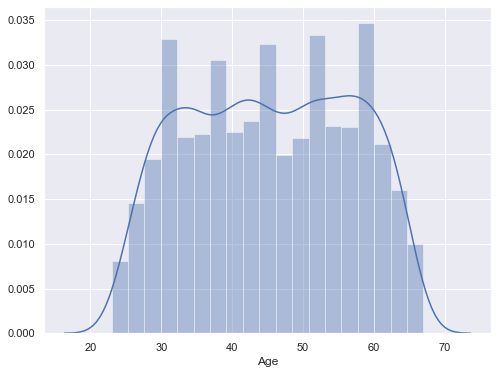

In [18]:
#Understanding the data with univariate and bivariate plots
#Countplot for Age (quantitative variable)
df1 = datadf['Age']
plt.figure(figsize=(8,6))
sns.distplot(df1) 

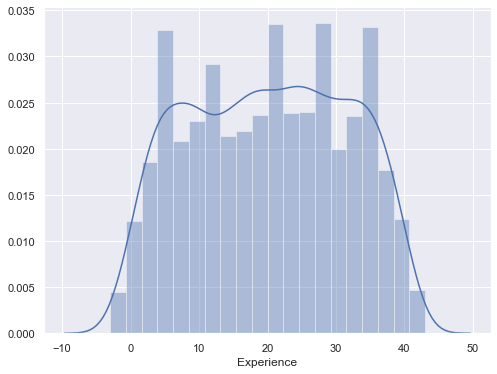

In [19]:
#Displot for Experience (quantitative variable), similar dist to age
df2 = datadf['Experience']
plt.figure(figsize=(8,6))
sns.distplot(df2) 

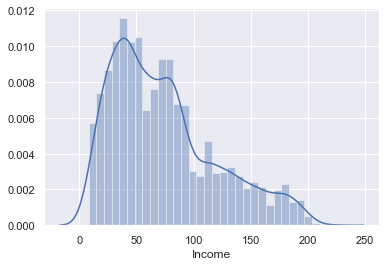

In [20]:
#Displot for Income in $000 (quantitative variable)
df3 = datadf['Income']
sns.distplot(df3) 
#Skewed right

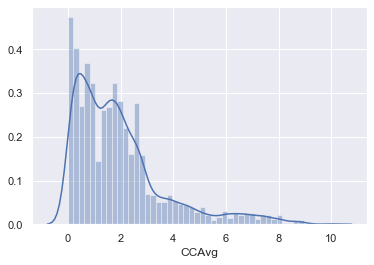

In [21]:
#Displot for CCAvg (quantitative variable)
df4 = datadf['CCAvg']
sns.distplot(df4) 
# As noted before, 106 people with zero monthly credit card spending

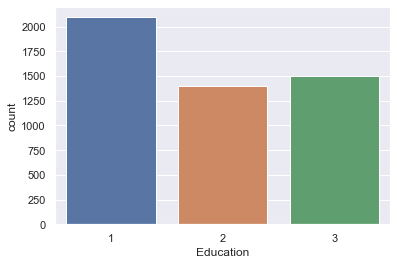

In [22]:
#Countplot for Education (categorical variable)
df4 = datadf['Education']
sns.countplot(df4) 

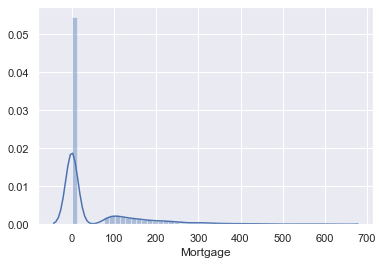

In [23]:
#Displot for Mortgage (quantitative variable)
df5 = datadf['Mortgage']
sns.distplot(df5) 
# As noted before, 3462 people have 0 mortgage. 
# This data is highly skewed, so we should consider dropping this column.
#datadf.drop(['Mortgage'], axis=1, inplace=True)

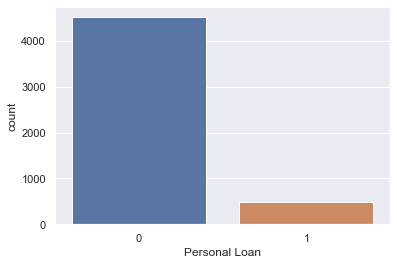

In [24]:
#Countplot for Personal Loan (categorical variable)
df6 = datadf['Personal Loan']
sns.countplot(df6) 

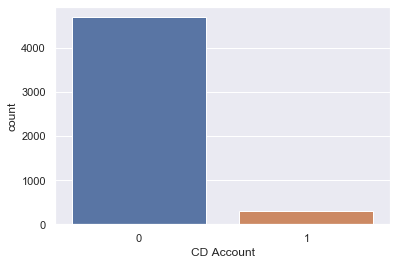

In [88]:
#Countplot for CD Account (categorical variable)
df7 = datadf['CD Account']
sns.countplot(df7) 

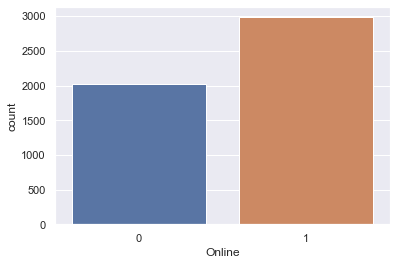

In [25]:
#Countplot for Online (categorical variable)
df9 = datadf['Online']
sns.countplot(df9)

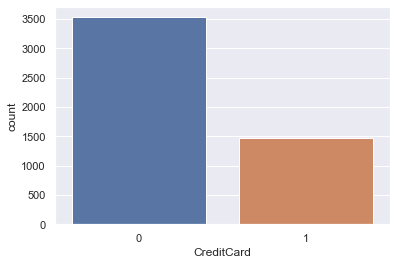

In [26]:
#Countplot for CreditCard (8th categorical variable)
df10 = datadf['CreditCard']
sns.countplot(df10)

In [66]:
#Drawing relationship between Age, Income, ZIP Code, Online, OR any variables we would like to explore
datadf.groupby(['Age','Income','ZIP Code'])['Personal Loan'].value_counts()

Age  Income  ZIP Code  Personal Loan
23   12      91605     0                1
             95064     0                1
     13      94720     0                1
     45      95422     0                1
     55      92704     0                1
     61      92374     0                1
     73      92120     0                1
     75      90291     0                1
     81      91711     0                1
     82      92152     0                1
     149     91709     0                1
             93555     0                1
24   28      90089     0                1
     35      94305     0                1
             94704     0                1
     38      92612     0                1
             93555     0                1
             95045     0                1
     39      94085     0                1
     41      91768     0                1
     44      90089     0                1
             90638     0                1
     50      94920     0               

In [67]:
#Get Data Model Ready, Replace 0s with serial mean for Mortgage and CCAvg as those are relevent
from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols=['CCAvg']
imputer = rep_0.fit(datadf[cols])
datadf[cols] = imputer.transform(datadf[cols])
datadf.head(10)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
5,37,13,29,92121,4,0.40,2,155,0,0,0,1,0
6,53,27,72,91711,2,1.50,2,0,0,0,0,1,0
7,50,24,22,93943,1,0.30,3,0,0,0,0,0,1
8,35,10,81,90089,3,0.60,2,104,0,0,0,1,0
9,34,9,180,93023,1,8.90,3,0,1,0,0,0,0


In [68]:
#Correlation matrix 
datadf.corr()  
#*Personal Loan is positively correlated with Income, Family, CCAvg, Education, & CD Account 

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan
Age,1.00,0.99,-0.06,-0.03,-0.05,-0.05,0.04,-0.01,-0.01
Experience,0.99,1.00,-0.05,-0.03,-0.05,-0.05,0.01,-0.01,-0.01
Income,-0.06,-0.05,1.00,-0.02,-0.16,0.66,-0.19,0.21,0.50
ZIP Code,-0.03,-0.03,-0.02,1.00,0.01,-0.00,-0.02,0.01,0.00
Family,-0.05,-0.05,-0.16,0.01,1.00,-0.12,0.06,-0.02,0.06
CCAvg,-0.05,-0.05,0.66,-0.00,-0.12,1.00,-0.14,0.11,0.36
Education,0.04,0.01,-0.19,-0.02,0.06,-0.14,1.00,-0.03,0.14
Mortgage,-0.01,-0.01,0.21,0.01,-0.02,0.11,-0.03,1.00,0.14
Personal Loan,-0.01,-0.01,0.50,0.00,0.06,0.36,0.14,0.14,1.00


In [69]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')


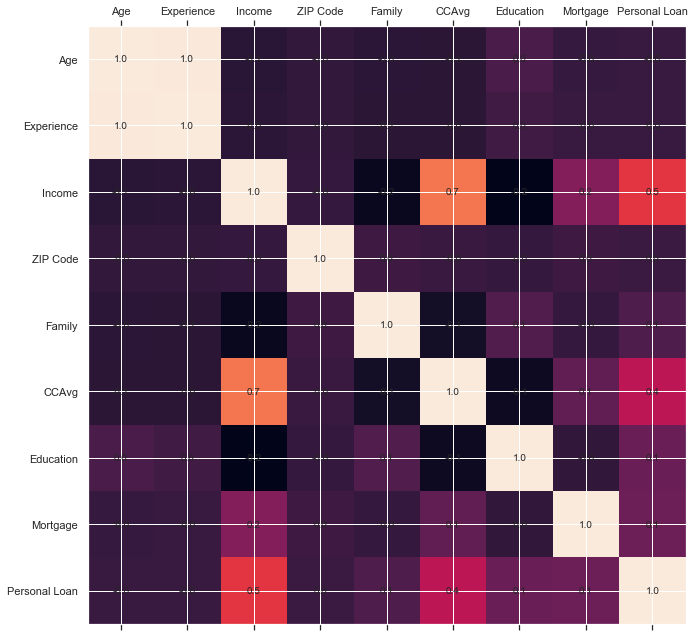

In [71]:
plot_corr(datadf)

In [72]:
#Analyzing the distribution of the various attributes
datadf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.00,45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,5000.00,20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,5000.00,73.77,46.03,8.00,39.00,64.00,98.00,224.00
ZIP Code,5000.00,93152.50,2121.85,9307.00,91911.00,93437.00,94608.00,96651.00
Family,5000.00,2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,5000.00,1.98,1.72,0.10,0.70,1.60,2.50,10.00
Education,5000.00,1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,5000.00,56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal Loan,5000.00,0.10,0.29,0.00,0.00,0.00,0.00,1.00


In [73]:
# Target column which is 'Personal Loan' to understand how the data is distributed amongst the various values
datadf.groupby(["Personal Loan"]).mean()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage
Personal Loan,,,,,,,,
0,45.37,20.13,66.24,93152.43,2.37,1.78,1.84,51.79
1,45.07,19.84,144.75,93153.20,2.61,3.91,2.23,100.85


In [74]:
datadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIP Code            5000 non-null   int64   
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   int64   
 7   Mortgage            5000 non-null   int64   
 8   Personal Loan       5000 non-null   int64   
 9   Securities Account  5000 non-null   category
 10  CD Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(4), float64(1), int64(8)
memory usage: 371.6 KB


In [75]:
#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
prop_Y = datadf['Personal Loan'].value_counts(normalize=True)
print(prop_Y)
# The data shows as Very imbalanced here

0   0.90
1   0.10
Name: Personal Loan, dtype: float64


#### 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [76]:
X = datadf.drop('Personal Loan',axis=1)     # Predictor feature columns (8 X m)
Y = datadf['Personal Loan']    # Predicted class (1=True, 0=False) (1 X m)

#Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

##Split into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 1)

In [77]:
#Checking the split of data
print("{0:0.2f}% data is in training set".format((len(X_train)/len(datadf.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(datadf.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [78]:
print("Original PL True Values    : {0} ({1:0.2f}%)".format(len(datadf.loc[datadf['Personal Loan'] == 1]), (len(datadf.loc[datadf['Personal Loan'] == 1])/len(datadf.index)) * 100))
print("Original PL False Values   : {0} ({1:0.2f}%)".format(len(datadf.loc[datadf['Personal Loan'] == 0]), (len(datadf.loc[datadf['Personal Loan'] == 0])/len(datadf.index)) * 100))
print("")
print("Training PL True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training PL False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test PL True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test PL False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original PL True Values    : 480 (9.60%)
Original PL False Values   : 4520 (90.40%)

Training PL True Values    : 331 (9.46%)
Training PL False Values   : 3169 (90.54%)

Test PL True Values        : 149 (9.93%)
Test PL False Values       : 1351 (90.07%)



#### 4. Use Logistic Regression model to predict the number of a customers buying personal loans. Print all the metrics related for evaluating the model performance (15 marks)

In [111]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

In [94]:
logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.124617
         Iterations 9


In [95]:
#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3487
Method:                           MLE   Df Model:                           12
Date:                Thu, 09 Jul 2020   Pseudo R-squ.:                  0.6018
Time:                        09:55:07   Log-Likelihood:                -436.16
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                4.879e-275
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -13.2012      5.009     -2.635      0.008     -23.019      -3.383
Age                     -0.0504      0.074     -0.684      0.494      -0.195       0.094
Experience  

In [ ]:
#Psuedo R^2 of 60% indicates 60% of the uncertainty of the intercept only model is explained by the full model.

In [82]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [83]:
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
CD Account_1,3.87,48.02,0.98,0.00
Education,1.74,5.67,0.85,0.00
Family,0.73,2.08,0.68,0.00
CCAvg,0.17,1.18,0.54,0.00
Income,0.05,1.06,0.51,0.00
Online_1,-0.63,0.53,0.35,0.00
CreditCard_1,-1.17,0.31,0.24,0.00
Securities Account_1,-1.20,0.30,0.23,0.00
const,-13.20,0.00,0.00,0.01


In [ ]:
#Customers with CD Account have a 98% probability of converting to Personal Loan customers.
#They are 48.02 times more likely to convert than those who do not have a CD Account.

#Education is also a good indicator of whether or not a customer will convert, with 85% probability.

In [96]:
#Model building using Sklearn
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
y_predict = logreg.predict(X_test)

In [97]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9082857142857143

Testing accuracy 0.908

Confusion Matrix


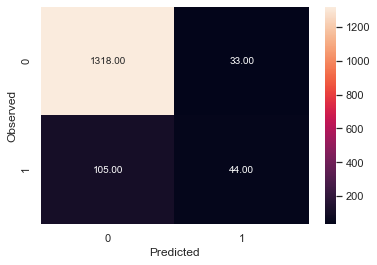

None

Recall: 0.2953020134228188

Precision: 0.5714285714285714

F1 Score: 0.3893805309734513

Roc Auc Score: 0.6354378312857988


In [98]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

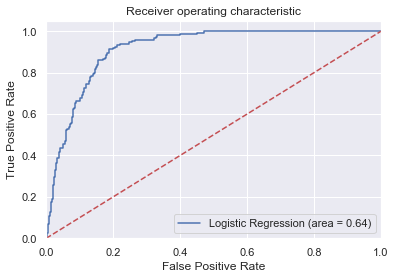

In [99]:
#Precision, Recall, F1, and Roc Auc Score are all very low.. Need to find different threshold
#Precision means the percentage of your results which are relevant. On the other hand, recall refers to the percentage of total relevant results correctly classified by your algorithm. 
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### 5. Give your reasoning on how can the model perform better? (10 marks)
Hint: Check parameter

In [100]:
#Evaluating params to see if its possible for the model to preform better. 
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [112]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.951, 0.908, 0.909, 0.905, 0.905]

[0.948, 0.908, 0.907, 0.901, 0.901]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [103]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.951, 0.905]

[0.947, 0.901]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
## Highest accuracy is same 'l1' with 'liblinear' and 'l2' with 'newton-cg'
# choose any one

In [104]:
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))

Trainig accuracy 0.8971428571428571

Testing accuracy 0.89


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
## Testing accuracy decreased. 

In [105]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.88, 0.899, 0.897, 0.897, 0.897, 0.897]

[0.879, 0.898, 0.892, 0.89, 0.89, 0.89]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
## Best testing accuracy is obtained for C=0.1
## By using this for C, the model will preform better.

Trainig accuracy 0.8985714285714286

Testing accuracy 0.898

Confusion Matrix


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


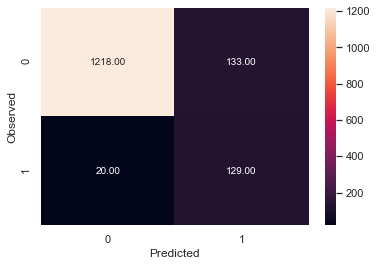

None

Recall: 0.8657718120805369

Precision: 0.49236641221374045

F1 Score: 0.6277372262773723

Roc Auc Score: 0.8836631081128072


In [106]:
#Therefore a better final model is:
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', class_weight='balanced',C=0.1) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [ ]:
#Recall is ~0.57 higher and F1 is ~.25 higher. Precision has gone down ~0.01 points
#Roc Auc has gone up ~0.25
#Overall the model has improved and will yield a better preformance.

#### 6. Give Business understanding of your model? (5 marks)

In [ ]:
#Confusion matrix means

#True Positive (observed=1,predicted=1):

#Predicted that customers will be part of the turnover and the customer is eligible for Personal Loan.

#False Positive (observed=0,predicted=1):

#Predicted that customers will be part of the turnover and the customers were not eligibile for Personal loan.

#True Negative (observed=0,predicted=0):

#Predicted that customers will not be part of the turnover and the customers were not eligibile for Personal loan.

#False Negative (observed=1,predicted=0):

#Predicted that customers will not be part of the turnover and the customers were eligibile for Personal loan.

#Here the bank wants to turnover the people who are eligible for the Personal loan i.e. less number of False Positive, if FP is high bank would lose money. So that the bank doesn't lose money on the people who are not eligible for the loan. Hence Precision is the important metric.

#In case of False negative bank will lose few customers but that okay because the bank would want to retain money more than customers who are not eligible for the Personal loan.

#After achieving the desired accuracy we can deploy the model for practical use. As in the bank now can predict who is eligible for PL turnover. They can use the model for predicting future Personal Loan Turnover customers.